# Model to predict housing prices

Business problem: Based on certain set of features, online company wants to predict the price of the house

[Dataset Reference](https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./datasets_20710_26737_Bengaluru_House_Data.csv')

## Beginning of step 1 - data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


#### Terminology alert*****

    1. CarpetArea -  Area of the house where carpet can be laid on the ground
    2. Built Up Area - carpet area + the area of the walls
    3. Super Built Up area - Built up area + the common area (area of elevator, common area, children playground)
    4. Plot area - Area on which the house or the apartment is built upon

In [5]:
df.groupby(['area_type']).area_type.agg('count')


area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df.groupby(['availability']).availability.agg('count').sort_values(ascending=False)

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
17-Jan               1
16-Jul               1
16-Nov               1
16-Oct               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [7]:
df.groupby(['location']).location.agg('count').sort_values(ascending=False)

location
Whitefield                              540
Sarjapur  Road                          399
Electronic City                         302
Kanakpura Road                          273
Thanisandra                             234
                                       ... 
Kodanda Reddy Layout                      1
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
 Anekal                                   1
Name: location, Length: 1305, dtype: int64

In [8]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

## Dropping unwanted features and handling null values

In [10]:
# dropping columns area_type, availability, society & balcony
df2 = df.drop(columns=['area_type', 'availability', 'society','balcony'])
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
# identifying null values in the dataset
df2.isnull().sum()

# since the null values are less than 10% therefore we will drop the data points

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
# dropping the null values from the dataset
df2.dropna(inplace = True)

In [13]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Exploring the dataset further to find any possible anomolies

In [14]:
df2['bath'].unique()
# data in the bath column looks fine, however there are certain outliers such as 27 and 40

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [15]:
df2['total_sqft'].unique()
# total_sqft column has anomolies in the data and needs to be corrected

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
df2['size'].unique()
# the size column also has anomolies and needs to be corrected

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
df2['location'].unique()
# location column looks fine as of now and can be used as a categorical feature later

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [18]:
# fixing the size column by splitting the string and storing the first 
# index value in a newly created column as an integer

df2['bedrooms']=df2['size'].apply(lambda x: float(x.split(' ')[0]))

In [19]:
df2[df2['total_sqft']=='34.46Sq. Meter']

,location,size,total_sqft,bath,price,bedrooms
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.5,1.0


In [20]:
def convert_sqft(x):
    y = x.split('-')
    if len(y)==2:
        return (float(y[0])+float(y[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
#testing the function

print(convert_sqft('110')) # should return 110 as a float datatype (110.0)
print(convert_sqft('110 - 120')) # should return the average of 110 and 120 i.e. 115.0
print(convert_sqft('110.mt')) # should return noting

110.0
115.0
None


In [22]:
# applying the function for the entire dataset
df2['total_sqft']=df2['total_sqft'].apply(convert_sqft)

In [23]:
# exploring the dataset after applying the function
df2.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bedrooms       0
dtype: int64

In [24]:
# dropping the null values as the dataset contains sqft values in sq. meter, perch, sq. inch... etc
df2.dropna(inplace=True)

In [25]:
df2.shape

(13200, 6)

In [26]:
df2.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0


In [27]:
df3 = df2.copy()

In [28]:
df3.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0


## End of data exploration and basic data cleaning

# Step 2- Beginning of feature engineering & outlier removal

In this step we will try to create a new feature `price_per_sqft` which will help to identify outliers later

In [29]:
df3['price_per_sqft'] = (df3['price']*100000) / df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


<function matplotlib.pyplot.show(*args, **kw)>

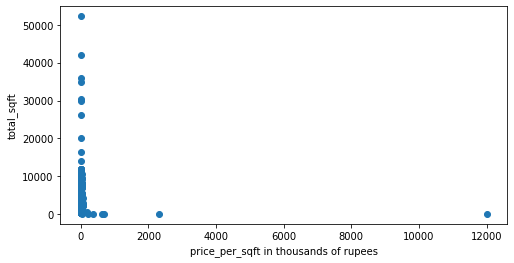

In [30]:
# we will try to plot distribution of the price_per_sqft
fig = plt.figure(figsize=(8,4))
plt.scatter(df3['price_per_sqft']/1000,df3['total_sqft'])
plt.ylabel('total_sqft')
plt.xlabel('price_per_sqft in thousands of rupees')
plt.show

In [31]:
df3['total_sqft'].describe()

count    13200.000000
mean      1555.302783
std       1237.323445
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1672.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [32]:
df3[df3['total_sqft'] > 10000]

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
408,Rajaji Nagar,7 BHK,12000.0,6.0,2200.0,7.0,18333.333333
440,Whitefield,4 Bedroom,11890.0,4.0,700.0,4.0,5887.300252
605,Malleshwaram,7 BHK,12000.0,7.0,2200.0,7.0,18333.333333
674,Yelahanka,3 BHK,35000.0,3.0,130.0,3.0,371.428571
810,4 Bedroom Farm House in Bagalur,4 Bedroom,10961.0,4.0,80.0,4.0,729.860414
1234,Siddapura,4 Bedroom,14000.0,3.0,800.0,4.0,5714.285714
1894,Nelamangala,3 Bedroom,52272.0,2.0,140.0,3.0,267.829813
2620,Sathya Sai Layout,6 BHK,11338.0,9.0,1000.0,6.0,8819.897689
2623,Dodsworth Layout,4 Bedroom,30000.0,4.0,2100.0,4.0,7000.000000
3096,Jp nagar 8th Phase .,10 BHK,12000.0,12.0,525.0,10.0,4375.000000


In [33]:
len(df3.location.unique())

1298

In [34]:
location_count= df3.groupby(by=['location'])['location'].agg('count').sort_values(ascending=False)

In [35]:
# identifying the unique locations along with their count
location_count

location
Whitefield                              532
Sarjapur  Road                          392
Electronic City                         302
Kanakpura Road                          264
Thanisandra                             232
                                       ... 
Kodanda Reddy Layout                      1
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
 Anekal                                   1
Name: location, Length: 1298, dtype: int64

In [36]:
len(location_count[location_count<=10])

1058

In [37]:
location_cnt_lt_10 = location_count[location_count<=10]
location_cnt_lt_10

location
Basapura                                10
Naganathapura                           10
Thyagaraja Nagar                        10
Gunjur Palya                            10
Sadashiva Nagar                         10
                                        ..
Kodanda Reddy Layout                     1
Kirloskar layout, Basaveshwarnagar       1
Kengeri Satellite Town Stage II          1
Kengeri Satellite Town KHB Apartment     1
 Anekal                                  1
Name: location, Length: 1058, dtype: int64

In [41]:
# converting new category "others" for less frequent occuring locations
df3['location'] = df3['location'].apply(lambda x: 'others' if x in location_cnt_lt_10 else x.strip())

In [42]:
df3.groupby('location')['location'].agg('count').sort_values(ascending=False).head(20)

location
others                      2901
Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
Yelahanka                    210
Uttarahalli                  186
Hebbal                       176
Marathahalli                 175
Raja Rajeshwari Nagar        171
Bannerghatta Road            151
Hennur Road                  150
7th Phase JP Nagar           148
Haralur Road                 141
Electronic City Phase II     131
Rajaji Nagar                 106
Chandapura                    98
Bellandur                     96
Hoodi                         88
Name: location, dtype: int64

In [43]:
len(df3['location'].unique())

240

In [44]:
df3

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,6689.834926
13316,others,4 BHK,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0,10407.336319


In [45]:
df3['total_sqft'].describe()

count    13200.000000
mean      1555.302783
std       1237.323445
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1672.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [46]:
# adhoc calculations to check min, max, count 
print('min is ',df3['total_sqft'].min())
print('max is ',df3['total_sqft'].max())
print('count is ',len(df3['total_sqft']))
print('sqrt of count is ',np.sqrt(len(df3['total_sqft'])))
print('width of interval is', 52271/115)


min is  1.0
max is  52272.0
count is  13200
sqrt of count is  114.89125293076057
width of interval is 454.5304347826087


(array([1.3082e+04, 9.7000e+01, 1.2000e+01, 2.0000e+00, 1.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 5.22810e+03, 1.04552e+04, 1.56823e+04, 2.09094e+04,
        2.61365e+04, 3.13636e+04, 3.65907e+04, 4.18178e+04, 4.70449e+04,
        5.22720e+04]),
 <a list of 10 Patch objects>)

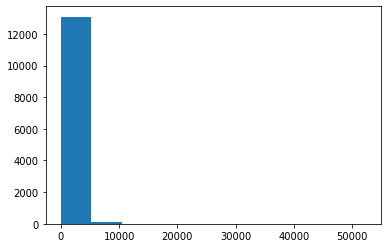

In [47]:
plt.hist(df3['total_sqft'])

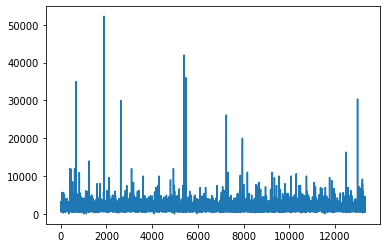

In [48]:
plt.plot(df3['total_sqft'])

In [49]:
df3['bedrooms'] = df2['bedrooms']

In [50]:
df3[df3['total_sqft']>=10000]

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
408,Rajaji Nagar,7 BHK,12000.0,6.0,2200.0,7.0,18333.333333
440,Whitefield,4 Bedroom,11890.0,4.0,700.0,4.0,5887.300252
605,Malleshwaram,7 BHK,12000.0,7.0,2200.0,7.0,18333.333333
674,Yelahanka,3 BHK,35000.0,3.0,130.0,3.0,371.428571
810,others,4 Bedroom,10961.0,4.0,80.0,4.0,729.860414
1234,others,4 Bedroom,14000.0,3.0,800.0,4.0,5714.285714
1894,others,3 Bedroom,52272.0,2.0,140.0,3.0,267.829813
2620,others,6 BHK,11338.0,9.0,1000.0,6.0,8819.897689
2623,others,4 Bedroom,30000.0,4.0,2100.0,4.0,7000.000000
3096,others,10 BHK,12000.0,12.0,525.0,10.0,4375.000000


In [51]:
df3.shape

(13200, 7)

In [52]:
# removing the data anamolies where the size of the bedroom is less than 300sqft
df4 = df3[df3['total_sqft']/df3['bedrooms']>300]

In [53]:
df4.shape

(12274, 7)

In [54]:
df4['price_per_sqft'].describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

In [55]:
df4[df4['location'] == 'Electronic City Phase II'].price_per_sqft.describe()

count      126.000000
mean      3827.155558
std       2146.246347
min       2153.846154
25%       2887.891850
50%       2969.210526
75%       4593.225704
max      24583.333333
Name: price_per_sqft, dtype: float64

In [56]:
np.mean(df4[df4['location'] == 'Electronic City Phase II'].price_per_sqft)

3827.1555577360914

In [57]:
np.std(df4[df4['location'] == 'Electronic City Phase II'].price_per_sqft)

2137.7125308610584

In [58]:
#df4[(df4['price_per_sqft'] > (3828-2138)) and (df4['price_per_sqft'] < (3828+2138))]

red_df = df4[(df4['price_per_sqft'] > (3828-2138))]


In [59]:
red_df[red_df['price_per_sqft'] < (3828+2138)]

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2.0,3247.863248
...,...,...,...,...,...,...,...
13310,Rachenahalli,2 BHK,1050.0,2.0,52.71,2.0,5020.000000
13312,Bellandur,2 BHK,1262.0,2.0,47.00,2.0,3724.247227
13313,Uttarahalli,3 BHK,1345.0,2.0,57.00,3.0,4237.918216
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.545136


In [60]:
df4[df4['location'] == 'Electronic City Phase II'].price_per_sqft.sort_values(ascending=False)

12508    24583.333333
882       6349.206349
907       6250.000000
2530      6224.066390
10840     5979.381443
             ...     
8603      2600.000000
9446      2500.000000
527       2500.000000
4769      2500.000000
10830     2153.846154
Name: price_per_sqft, Length: 126, dtype: float64

In [61]:
def remove_outliers_ppsqft(df):
    ro_df = pd.DataFrame()
    uni_location = df['location'].unique()
    #print(uni_location)
    for x in uni_location:
        #print(x)
        mean_pr_per_sqft = np.mean(df[df['location'] == x].price_per_sqft)
        std_pr_per_sqft = np.std(df[df['location'] == x].price_per_sqft)
        #print(mean_pr_per_sqft, std_pr_per_sqft)
        red_df = df[df['location'] == x]
        red_df = red_df[red_df['price_per_sqft'] > (mean_pr_per_sqft - std_pr_per_sqft)]
        #print(red_df.price.count())
        red_df = red_df[red_df['price_per_sqft'] < (mean_pr_per_sqft + std_pr_per_sqft)]
        #print(red_df.price.count())
        ro_df = pd.concat([red_df, ro_df], ignore_index=True)
        #print(ro_df.price.count())
    return ro_df
        

In [62]:
df5 = remove_outliers_ppsqft(df4)

In [63]:
df5.shape

(10018, 7)

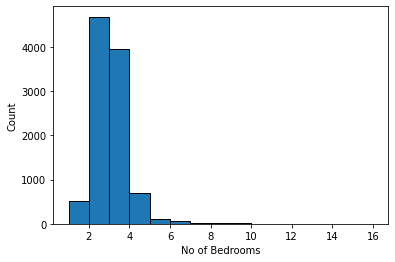

In [64]:
# plotting the distribution of the bedrooms in the dataset
br_bin = sorted(df5['bedrooms'].unique())
br_bin

plt.hist(df5['bedrooms'],bins=br_bin,edgecolor='black')
plt.xlabel('No of Bedrooms')
plt.ylabel('Count')
plt.show()

In [65]:
df5.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Kenchenahalli,2 BHK,1015.0,2.0,58.0,2.0,5714.285714
1,Kenchenahalli,2 BHK,1150.0,2.0,58.0,2.0,5043.478261
2,Kenchenahalli,3 BHK,1280.0,2.0,69.0,3.0,5390.625000
3,Kenchenahalli,3 BHK,1410.0,2.0,73.0,3.0,5177.304965
4,Kenchenahalli,2 BHK,870.0,1.0,45.0,2.0,5172.413793


In [66]:
df5[df5['bath']-df5['bedrooms']>2]

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
1211,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.032520
3023,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4.0,6428.571429
6145,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0,6423.034330
6687,others,6 BHK,11338.0,9.0,1000.0,6.0,8819.897689


In [67]:
df5 = df5[df5['bath']-df5['bedrooms']<=2]

In [68]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10014 entries, 0 to 10017
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        10014 non-null  object 
 1   size            10014 non-null  object 
 2   total_sqft      10014 non-null  float64
 3   bath            10014 non-null  float64
 4   price           10014 non-null  float64
 5   bedrooms        10014 non-null  float64
 6   price_per_sqft  10014 non-null  float64
dtypes: float64(5), object(2)
memory usage: 625.9+ KB


In [69]:
df6 = df5.drop(columns=['size','price_per_sqft'])

In [70]:
df6.head(4)

,location,total_sqft,bath,price,bedrooms
0,Kenchenahalli,1015.0,2.0,58.0,2.0
1,Kenchenahalli,1150.0,2.0,58.0,2.0
2,Kenchenahalli,1280.0,2.0,69.0,3.0
3,Kenchenahalli,1410.0,2.0,73.0,3.0


# Step3- Preparing the final dataframe for model building
### Prior to model building, the categorical columns have to be handled via one hot encoding

In [71]:
# identifying the categorical columns in the dataframe

df6.columns[df6.dtypes == 'object']

# the df6 has only 1 categorical column which is of type nominal and has to be one hot encoded

Index(['location'], dtype='object')

In [72]:
dummies = pd.get_dummies(df6.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# concating two dataframes

# dropping the "others" column to avoid the dummy variable trap

df7 = pd.concat([df6,dummies.drop(columns='others')],axis='columns')
df7.head(3)

,location,total_sqft,bath,price,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Kenchenahalli,1015.0,2.0,58.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kenchenahalli,1150.0,2.0,58.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kenchenahalli,1280.0,2.0,69.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df7.drop(columns='location',inplace =True)

In [75]:
df7.head(5)

,total_sqft,bath,price,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1015.0,2.0,58.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1150.0,2.0,58.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1280.0,2.0,69.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1410.0,2.0,73.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,870.0,1.0,45.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Defining the features and label

In [76]:
x = df7.drop(columns='price')
x.head()

,total_sqft,bath,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1015.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1150.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1280.0,2.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1410.0,2.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,870.0,1.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
y = df7['price']
y.head()

0    58.0
1    58.0
2    69.0
3    73.0
4    45.0
Name: price, dtype: float64

## Splitting the dataset into train and test dataset

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

## Defining the linear regressor model

In [80]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg.score(x_test,y_test)

0.8236485522936108

In [81]:
# using k-fold cross validation and evaluating the Linear Regression model

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


In [82]:
shuff_cv = ShuffleSplit(n_splits=5, test_size= 0.2, random_state=0)
cross_val_score(LinearRegression(),x,y,cv=shuff_cv)

array([0.83721971, 0.80325497, 0.81158741, 0.77186743, 0.79339386])

In [87]:
# using GridSearch CV to perform model selection based on hyper parameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn import linear_model


In [84]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
# defining the models to be checked

models= {'Linear_Regression':{
        'model':LinearRegression(),
          'params':{
              'normalize':[True,False]        
          }
             
         },
         'lasso':{
             'model':linear_model.Lasso(),
             'params':{
                 'alpha':[1,2],
                 'normalize':[True,False],
                 'selection':['cyclic', 'random']
                 
             }
         },
         'Decision_Tree_Reg':{
             'model':DecisionTreeRegressor(),
             'params':{
                 'criterion':['mse', 'friedman_mse'],
                 'splitter':['best','random']
             }
         },
         'ElasticNet':{
             'model': linear_model.ElasticNet(),
             'params':{
                 'l1_ratio':[0.3,0.5,0.7],
                 'selection':['cyclic', 'random']
                 
             }
         }
    
}

In [91]:
def optimal_model_der(x,y):
    scores = []
    for model,params in models.items():
        shuff_cv = ShuffleSplit(n_splits=5, test_size= 0.2, random_state=0)
        gridcv = GridSearchCV(params['model'],params['params'],cv=shuff_cv)
        gridcv.fit(x,y)
        scores.append({'model':model,
                       'best_params':gridcv.best_params_,
                       'best_score':gridcv.best_score_
                      })
    return pd.DataFrame(scores)

In [92]:
optimal_model = optimal_model_der(x,y)
optimal_model.head(20)

,model,best_params,best_score
0,Linear_Regression,{'normalize': False},0.803465
1,lasso,"{'alpha': 1, 'normalize': False, 'selection': ...",0.699202
2,Decision_Tree_Reg,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.705641
3,ElasticNet,"{'l1_ratio': 0.3, 'selection': 'cyclic'}",0.693973


## After performing hyperparameter tuning for the selected models, we have come to the conclusion that the "Linear Regression" model gives the best performance and hence can be used here for prediction

In [93]:
def predict_price(location,sqft,bed,bath):
    loc_index = np.where(x.columns ==location)[0][0]
    arr = np.zeros(len(x.columns))
    arr[0] = sqft
    arr[1] = bed
    arr[2] = bath
    arr[loc_index] = 1
    return lin_reg.predict([arr])[0]

In [94]:
predict_price('1st Phase JP Nagar',1000,2,2)

96.4195795034041

In [95]:
predict_price('1st Phase JP Nagar',1000,2,2)

96.4195795034041

In [96]:
predict_price('1st Phase JP Nagar',1000,3,3)

97.0067630770205

In [97]:
predict_price('Indira Nagar',1000,2,2)

179.51995742401584

In [98]:
predict_price('Indira Nagar',1000,3,3)

180.10714099763226

In [99]:
predict_price('Indira Nagar',1000,3,2)

187.77620884076475

## Importing the model into a pickle file for deployment

In [100]:
import pickle
with open('housing_price_predict_model.pickle','wb') as f:
    pickle.dump(lin_reg,f)

In [104]:
# importing the column names of the model into json
import json
columns ={
    'data.columns': [cols.lower() for cols in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))